# Dataset EDA

This notebook will focus on analysing the spaceship-titanic dataset from kaggle. The csv files contain information about passengers on a fictional spaceship that crashes in space. The goal is to create a machine learning model that predict whether a passenger survives or not. Data has already been pre split into train and test datasets.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_palette('Set2')

## First Look

In [2]:
space = pd.read_csv('data/train.csv')
space.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Data Field Descriptions

- **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
- **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- **Destination** - The planet the passenger will be debarking to.
- **Age** - The age of the passenger.
- **VIP** - Whether the passenger has paid for special VIP service during the voyage.
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- **Name** - The first and last names of the passenger.
- **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

### Summary Statistics and Missing Data

In [3]:
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


#### Takeaways
- Most columns have small amounts of missing data, only **Transported** and **PassengerID** do not
- Datatype of **VIP** and **CryoSleep** should be changed to bool
- Other columns have appropriate datatypes

In [4]:
space.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


#### Takeaways
- **Cabin** can be broken into deck, room number, and side columns for further analysis
- group id can be extracted from **Passenger**, there might be differences betwen passengers in a group and out of a group
- Earth is the most frequently occuring planet
- Most passengers did not enter cryosleep
- There are fewer cabins than passengers, many passengers must be traveling as a group
- Minimum of age of passenger is 0 which should be explored further
- Average age of passengers is 28.82
- Most passengers did not elect to have VIP treatment
- All spending columns appear to be right skewed as median is much lower than mean
- About have the passengers where transported

## Handling Missing Values

In [5]:
missing = space.dropna()
(len(space) - len(missing)) / len(space)

0.24007822385827676

dropping rows with any missing values gets ride of 24% of entries, this is too much


### Is There a Pattern in Missing Data?

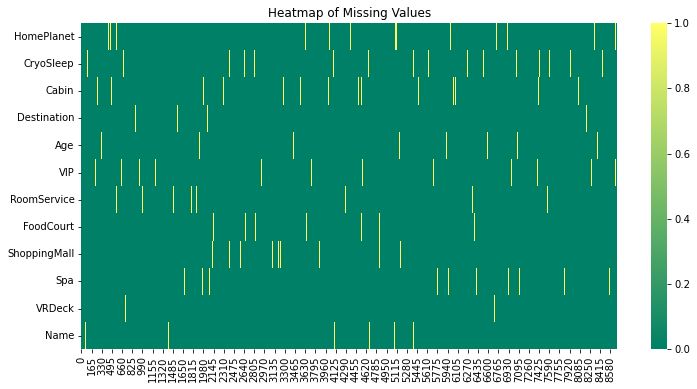

<Figure size 432x288 with 0 Axes>

In [67]:
plt.figure(figsize=(12,6))
sns.heatmap(space.drop(['PassengerId', 'Transported'], axis=1).isna().T, cmap='summer')
plt.title('Heatmap of Missing Values')
plt.show()
plt.clf()

There is no clear pattern in missing data

### Replacing Missing Values in Categorical Columns With 'Missing String'

In [6]:
space_clean = space.copy()
cat_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
for col in cat_cols:
    space_clean[col] = space_clean[col].fillna('Missing')

### Replacing Missing Values in Numeric Columns

While is is possible to replace missing numeric values with the mean of that column this can lead to some oddities when visualising and analysing data. For example, one would expect to see a large peak at the mean value

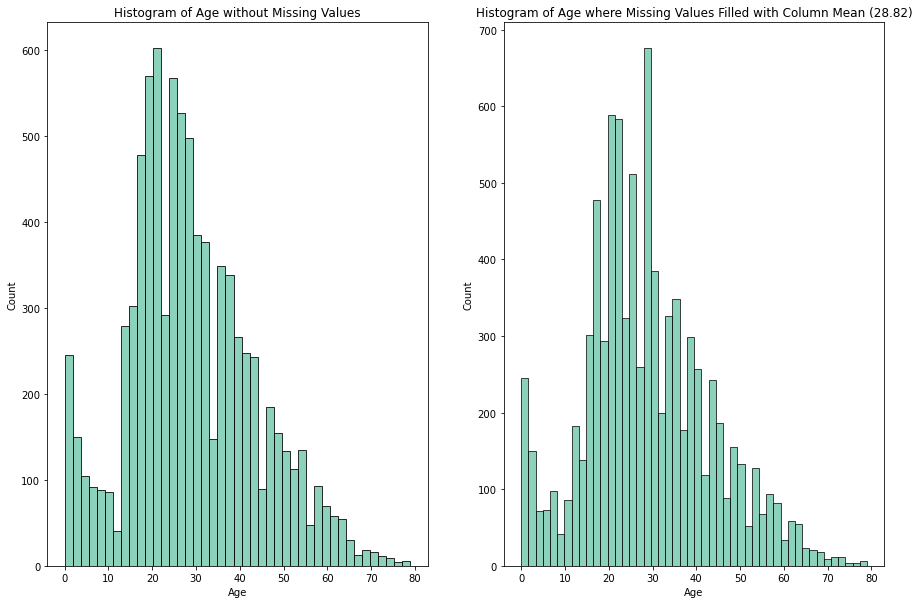

<Figure size 432x288 with 0 Axes>

In [7]:
fill_with_mean = space_clean['Age'].fillna(space_clean['Age'].mean())

plt.figure(figsize=(15, 10))

ax1 = plt.subplot(1, 2, 1)
sns.histplot(space_clean['Age'])
plt.title('Histogram of Age without Missing Values')

ax2 = plt.subplot(1, 2, 2)
sns.histplot(fill_with_mean)
plt.title(f'Histogram of Age where Missing Values Filled with Column Mean (28.82)')

plt.show()
plt.clf()

In the future, I will fill missing values with their closest neighbor using the KNNImputer from sklearn. This will filling missing numeric values with the value from the most similar data entry. When it comes to building machine learning models I believe this will help create more accurate models. For the sake of EDA, I will create visualisations without missing values and without imputing new data.

## Creating New Columns

### IsGroup
**IsGroup** will be a boolean column that determines whether a passenger is traveling in a group or not

In [8]:
space_clean['GroupNum'] = space_clean['PassengerId'].apply(lambda x: x.split('_')[0])
group_num_counts = space_clean['GroupNum'].value_counts()
space_clean['IsGroup'] = space_clean['GroupNum'].apply(lambda x: False if group_num_counts.get(x) == 1 else True)

### Extracting Deck, Room Number, and Side from Cabin Column

In [58]:
space_clean[['Deck', 'RoomNum', 'Side']] = space_clean['Cabin'].str.split('/', expand=True)
space_clean['RoomNum'] = pd.to_numeric(space_clean['RoomNum'], errors='coerce')
space_clean['Side'] = space_clean['Side'].fillna('Missing')

### TotalSpend
**TotalSpend** will be the sum of **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**. For this column I will assume that if a value is missing in any of the columns, that means nothing was spent

In [10]:
temp = space_clean[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)
space_clean['TotalSpend'] = temp.sum(axis=1)

### Summary Statistics on New Columns

In [39]:
space_clean[['IsGroup', 'Deck', 'RoomNum', 'Side', 'TotalSpend']].describe(include='all')

,IsGroup,Deck,RoomNum,Side,TotalSpend
count,8693,8693,8494,8693,8693.000000
unique,2,9,1817,3,NaN
top,False,F,82,S,NaN
freq,4805,2794,28,4288,NaN
mean,NaN,NaN,NaN,NaN,1440.866329
std,NaN,NaN,NaN,NaN,2803.045694
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,716.000000
75%,NaN,NaN,NaN,NaN,1441.000000


## Count Visualisations

### Transported

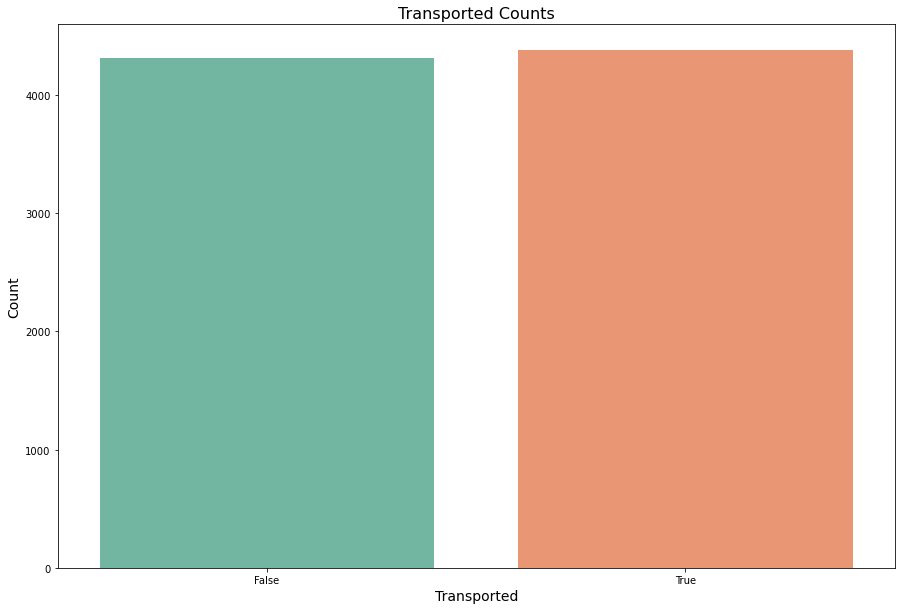

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(x='Transported', data=space_clean)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Transported', fontsize=14)
plt.title('Transported Counts', fontsize=16)
plt.show()
plt.clf()

### HomePlanet

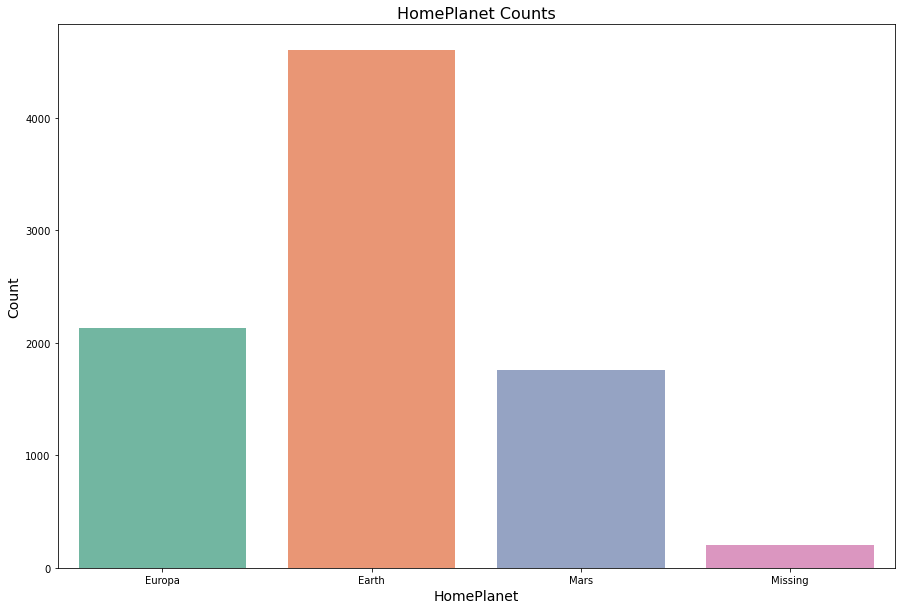

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x='HomePlanet', data=space_clean)
plt.ylabel('Count', fontsize=14)
plt.xlabel('HomePlanet', fontsize=14)
plt.title('HomePlanet Counts', fontsize=16)
plt.show()
plt.clf()

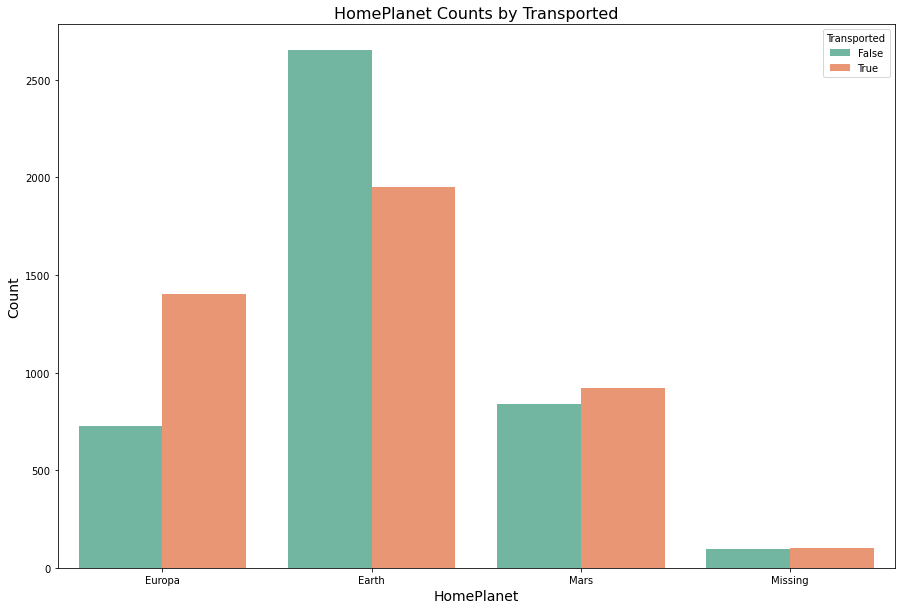

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(x='HomePlanet', hue='Transported', data=space_clean)
plt.ylabel('Count', fontsize=14)
plt.xlabel('HomePlanet', fontsize=14)
plt.title('HomePlanet Counts by Transported', fontsize=16)
plt.show()
plt.clf()

### CryoSleep

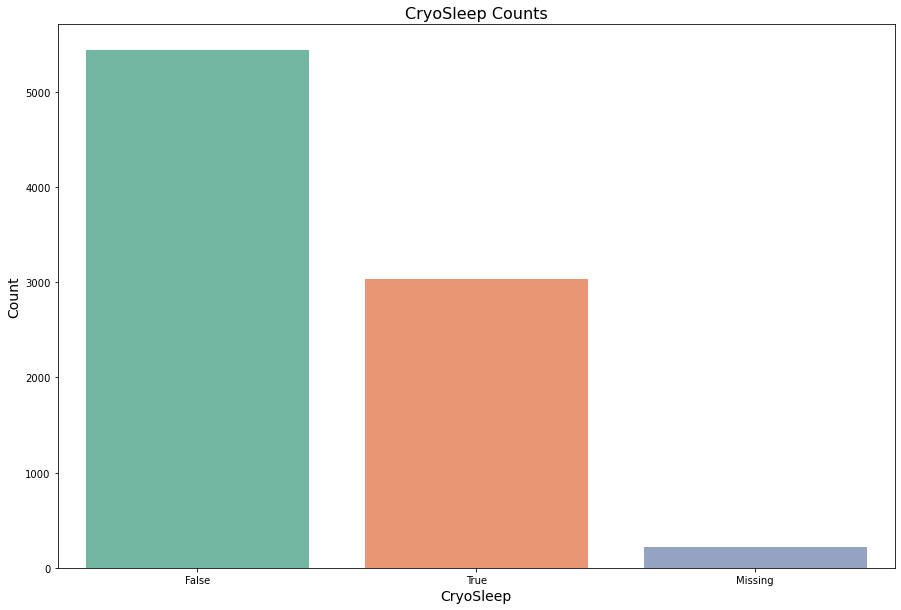

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(x='CryoSleep', data=space_clean)
plt.ylabel('Count', fontsize=14)
plt.xlabel('CryoSleep', fontsize=14)
plt.title('CryoSleep Counts', fontsize=16)
plt.show()
plt.clf()

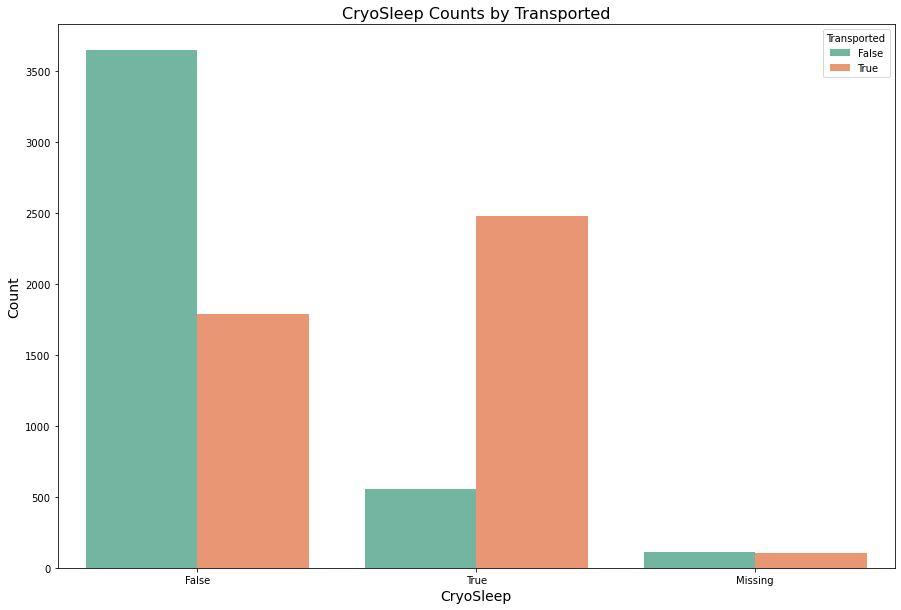

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x='CryoSleep', hue='Transported', data=space_clean)
plt.ylabel('Count', fontsize=14)
plt.xlabel('CryoSleep', fontsize=14)
plt.title('CryoSleep Counts by Transported', fontsize=16)
plt.show()
plt.clf()

### Deck

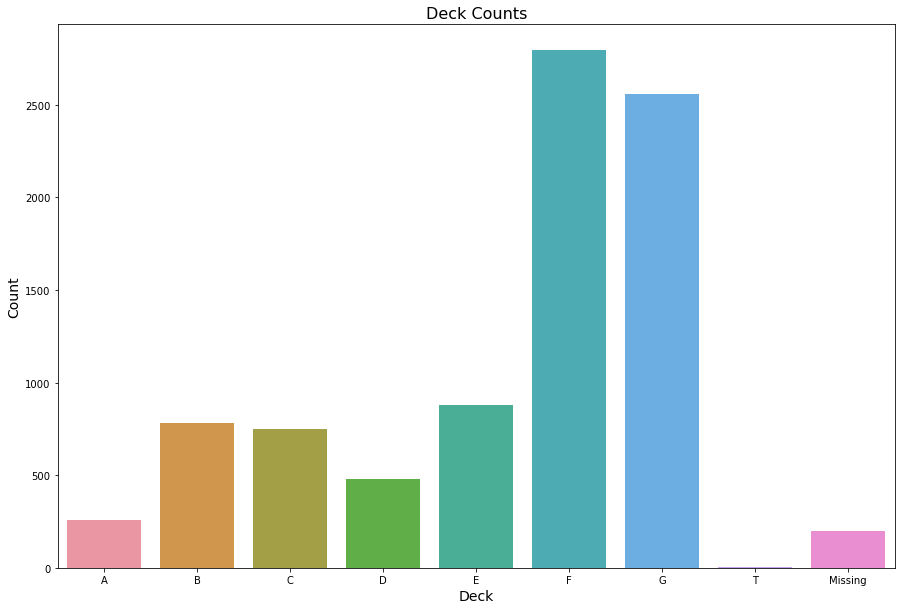

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x='Deck', data=space_clean, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Missing'])
plt.ylabel('Count', fontsize=14)
plt.xlabel('Deck', fontsize=14)
plt.title('Deck Counts', fontsize=16)
plt.show()
plt.clf()

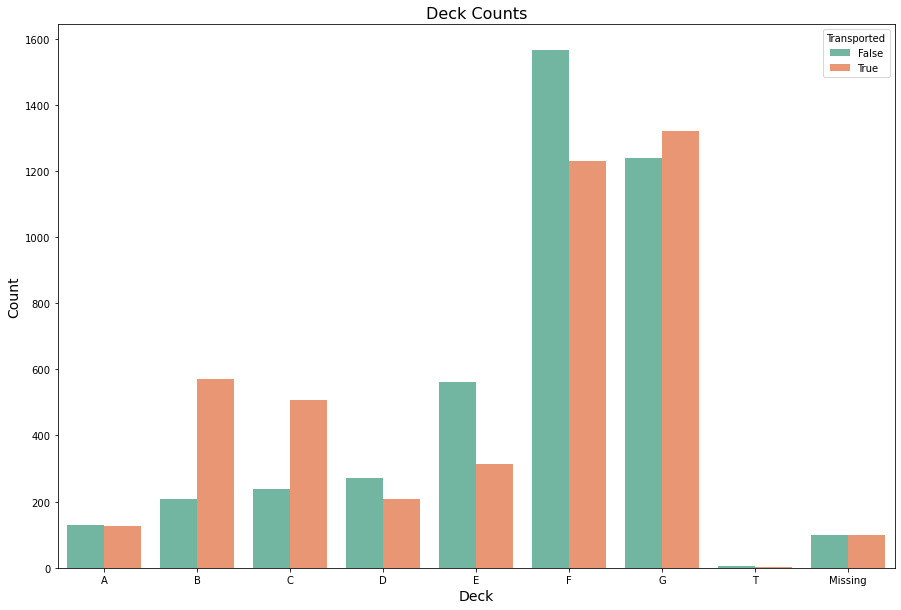

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x='Deck', hue='Transported', data=space_clean, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Missing'])
plt.ylabel('Count', fontsize=14)
plt.xlabel('Deck', fontsize=14)
plt.title('Deck Counts', fontsize=16)
plt.show()
plt.clf()

### Side

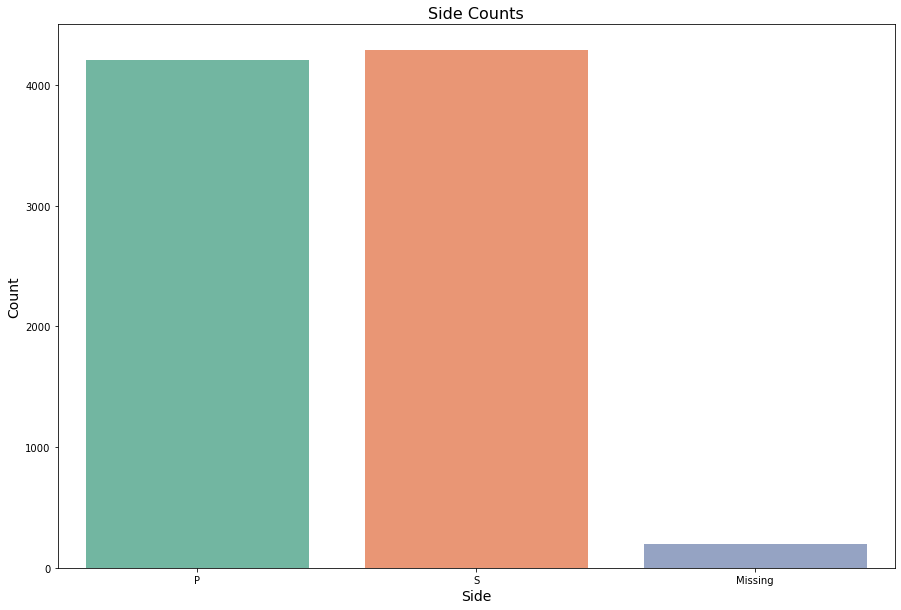

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(x='Side', data=space_clean)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Side', fontsize=14)
plt.title('Side Counts', fontsize=16)
plt.show()
plt.clf()

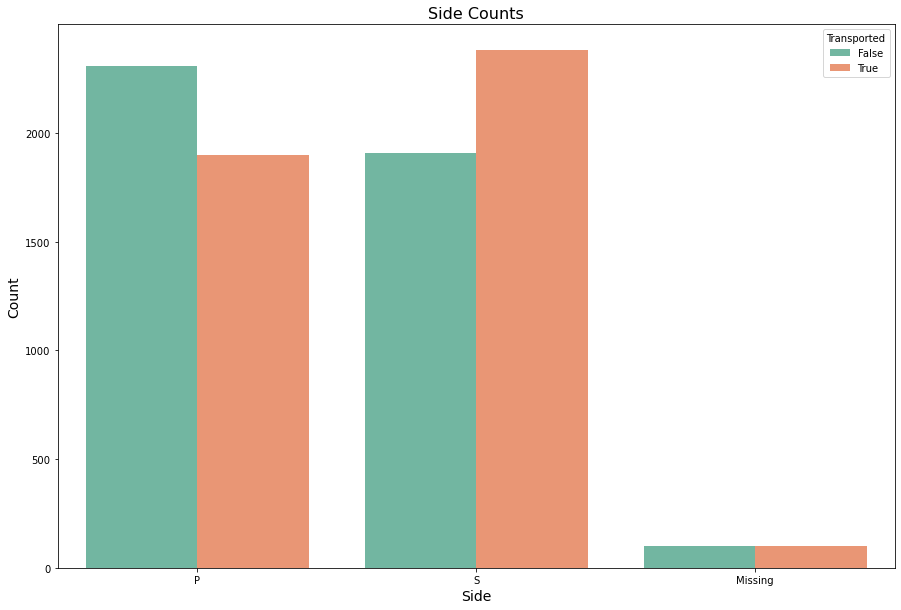

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(x='Side', hue='Transported', data=space_clean)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Side', fontsize=14)
plt.title('Side Counts', fontsize=16)
plt.show()
plt.clf()

### IsGroup

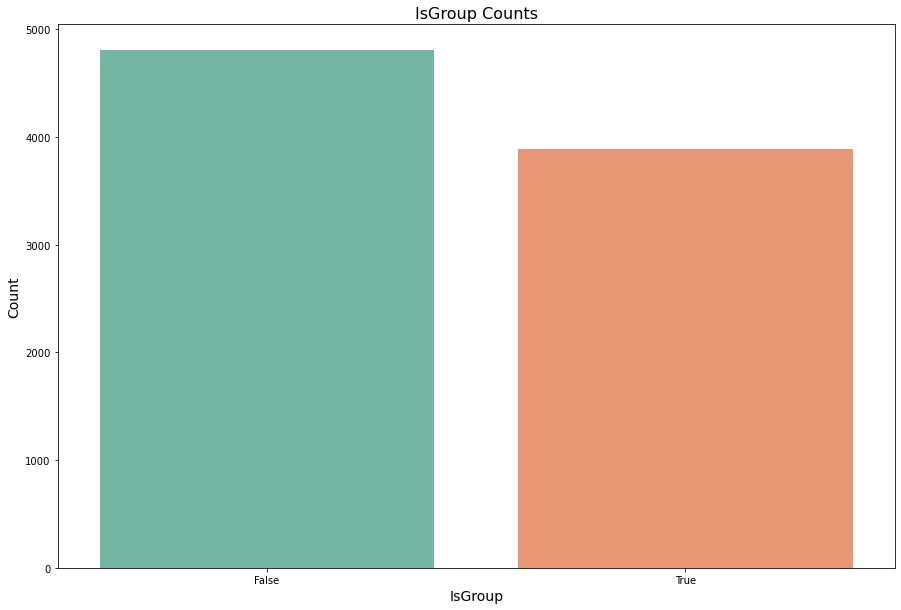

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(x='IsGroup', data=space_clean)
plt.ylabel('Count', fontsize=14)
plt.xlabel('IsGroup', fontsize=14)
plt.title('IsGroup Counts', fontsize=16)
plt.show()
plt.clf()

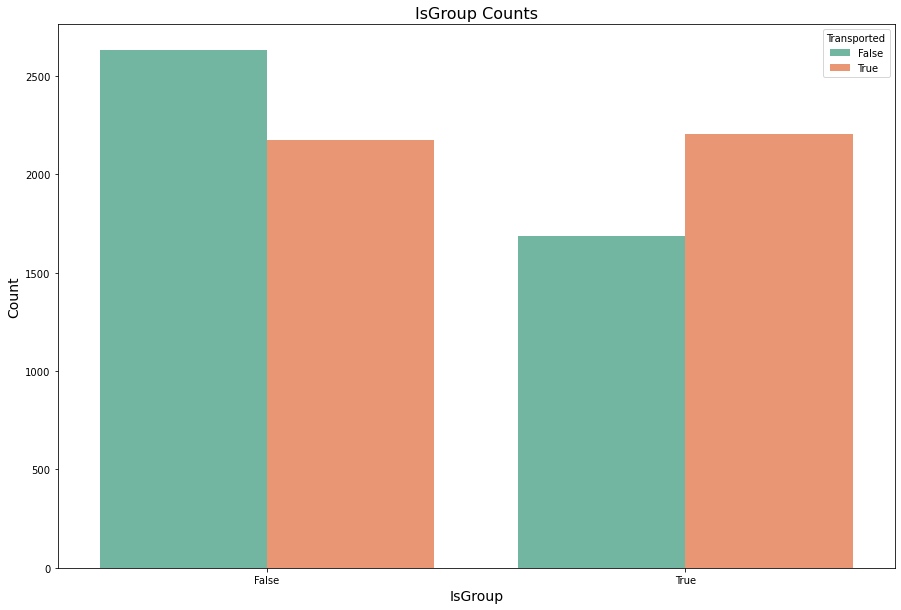

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(x='IsGroup', hue='Transported', data=space_clean)
plt.ylabel('Count', fontsize=14)
plt.xlabel('IsGroup', fontsize=14)
plt.title('IsGroup Counts', fontsize=16)
plt.show()
plt.clf()

### Destination

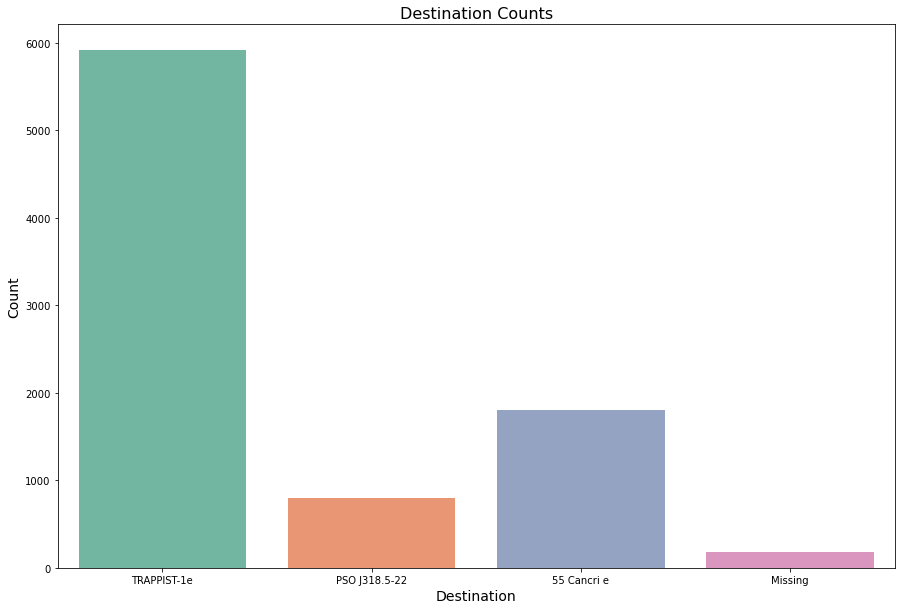

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(x='Destination', data=space_clean)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Destination', fontsize=14)
plt.title('Destination Counts', fontsize=16)
plt.show()
plt.clf()

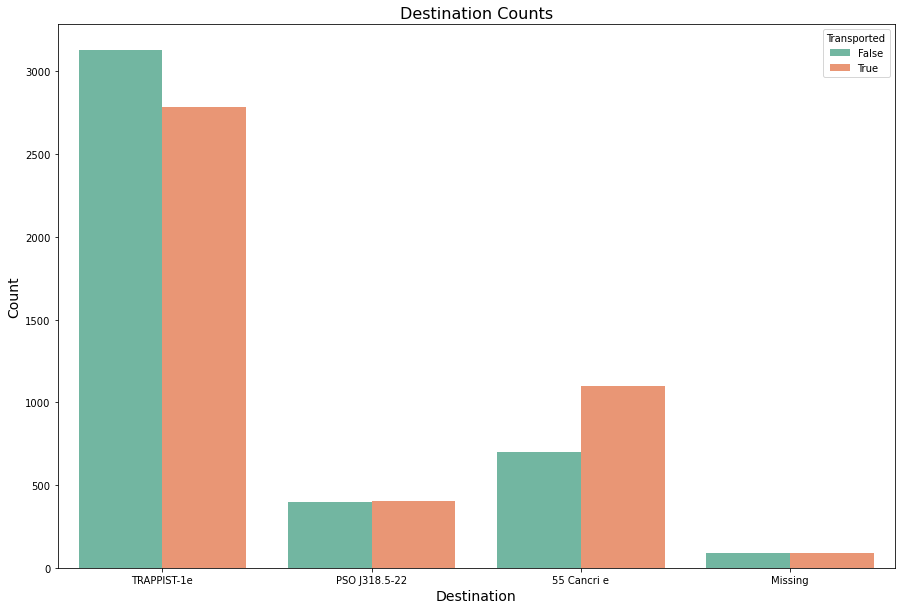

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(x='Destination', hue='Transported', data=space_clean)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Destination', fontsize=14)
plt.title('Destination Counts', fontsize=16)
plt.show()
plt.clf()

### VIP

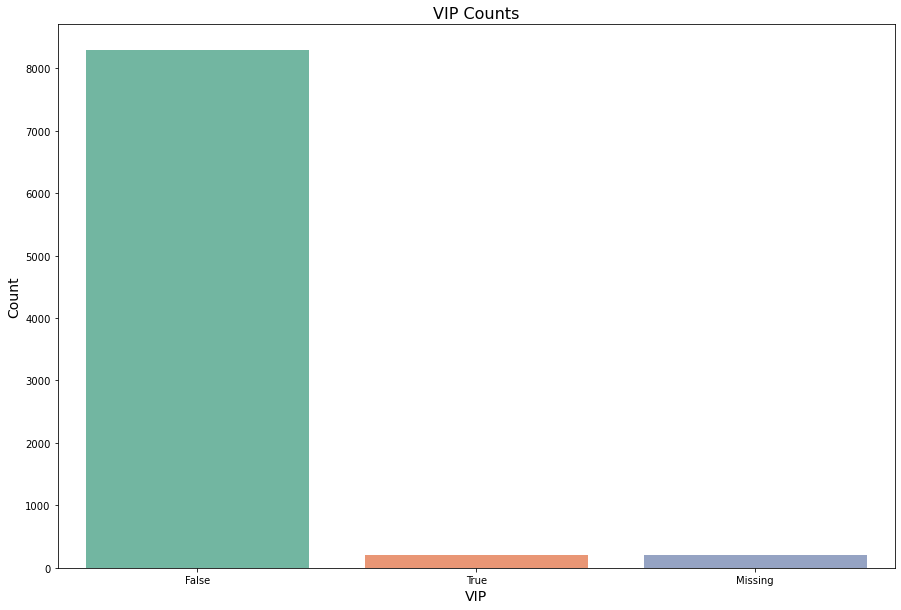

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(x='VIP', data=space_clean)
plt.ylabel('Count', fontsize=14)
plt.xlabel('VIP', fontsize=14)
plt.title('VIP Counts', fontsize=16)
plt.show()
plt.clf()

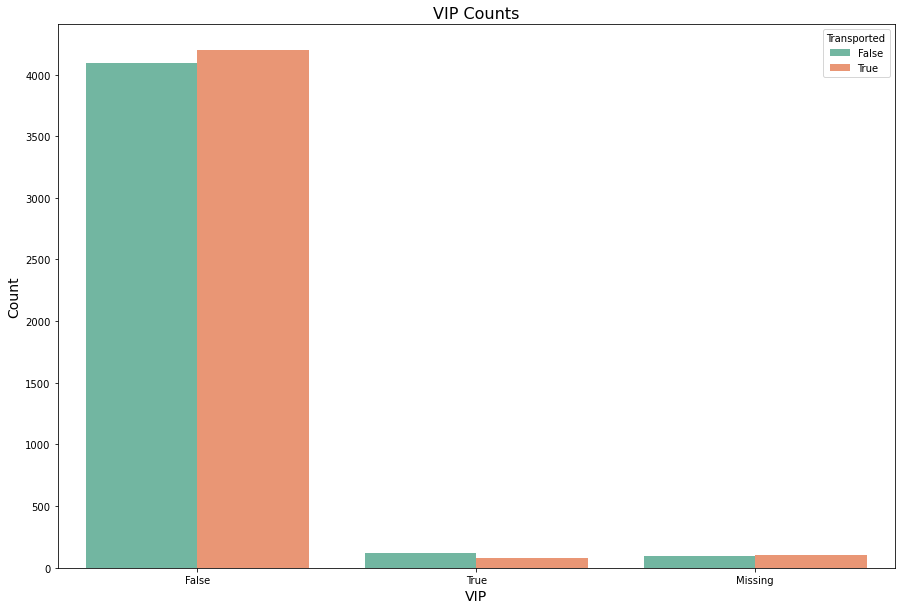

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(x='VIP', hue='Transported', data=space_clean)
plt.ylabel('Count', fontsize=14)
plt.xlabel('VIP', fontsize=14)
plt.title('VIP Counts', fontsize=16)
plt.show()
plt.clf()

## Distribution Visualisations
### Age

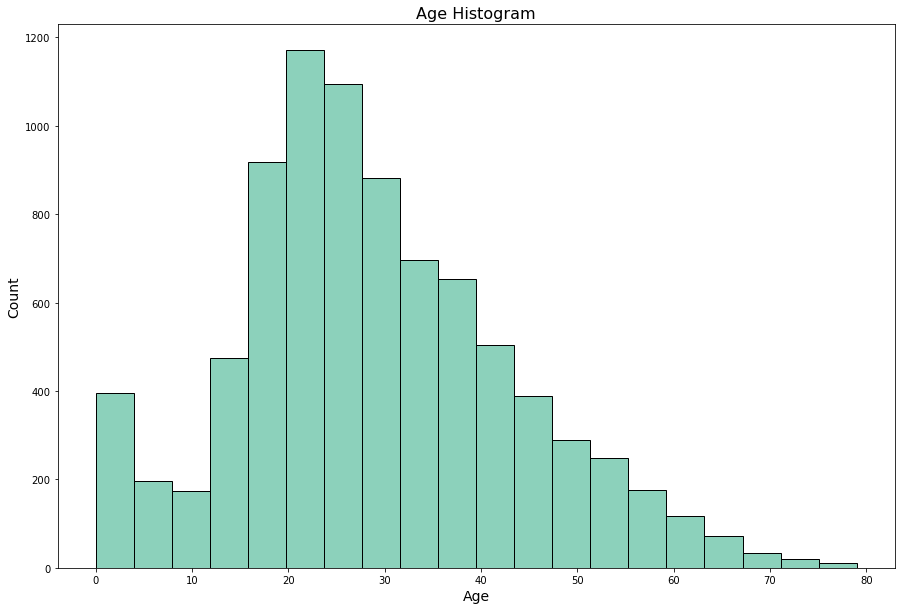

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(15,10))
sns.histplot(x='Age', data=space_clean, bins=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Age Histogram', fontsize=16)
plt.show()
plt.clf()

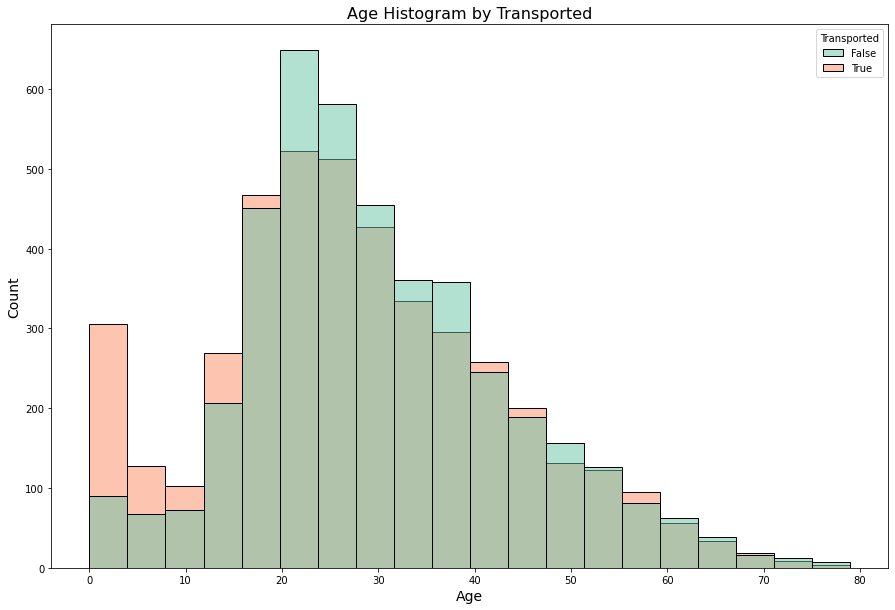

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(15,10))
sns.histplot(x='Age', data=space_clean, hue='Transported', bins=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Age Histogram by Transported', fontsize=16)
plt.show()
plt.clf()

### TotalSpend

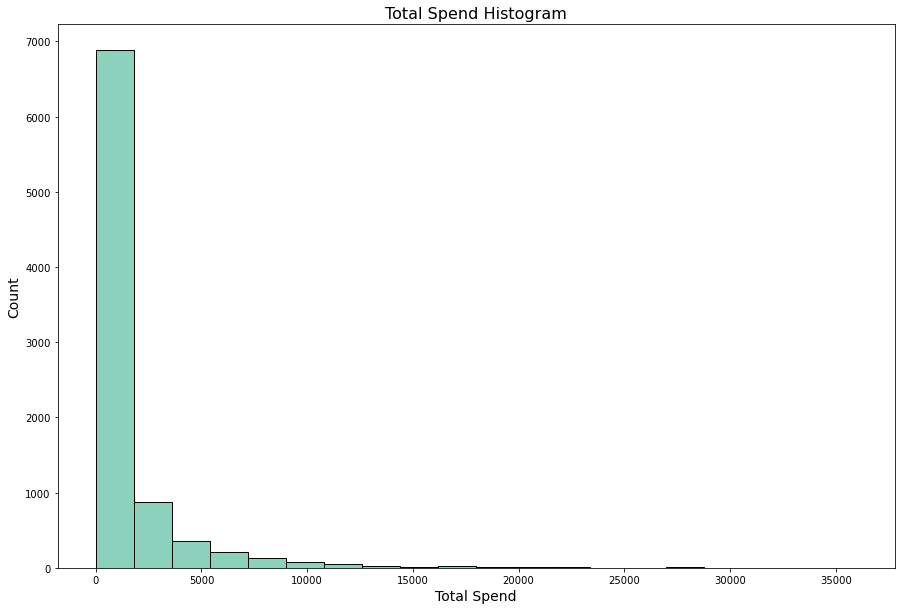

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(15,10))
sns.histplot(x='TotalSpend', data=space_clean, bins=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Total Spend', fontsize=14)
plt.title('Total Spend Histogram', fontsize=16)
plt.show()
plt.clf()

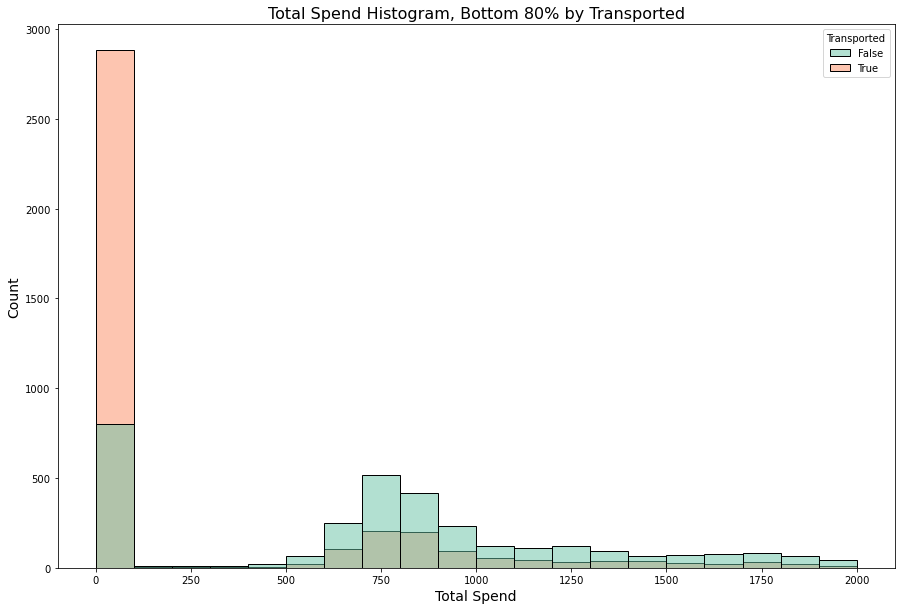

<Figure size 432x288 with 0 Axes>

In [61]:
plt.figure(figsize=(15,10))
sns.histplot(x='TotalSpend', data=space_clean[space_clean['TotalSpend'] <= 2000], hue='Transported', bins=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Total Spend', fontsize=14)
plt.title('Total Spend Histogram, Bottom 80% by Transported', fontsize=16)
plt.show()
plt.clf()

### RoomNum

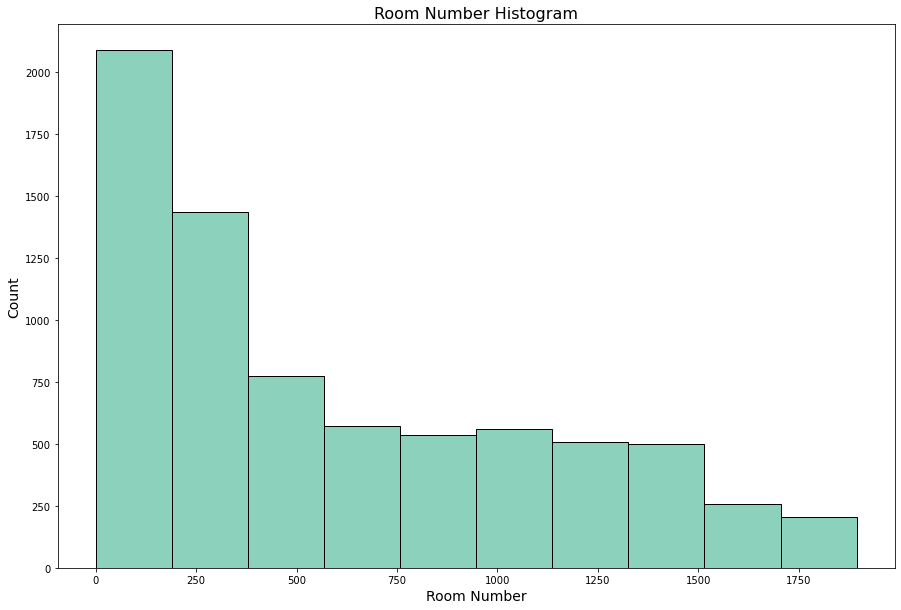

<Figure size 432x288 with 0 Axes>

In [60]:
plt.figure(figsize=(15,10))
sns.histplot(x='RoomNum', data=space_clean.dropna(), bins=10)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Room Number', fontsize=14)
plt.title('Room Number Histogram', fontsize=16)
plt.show()
plt.clf()

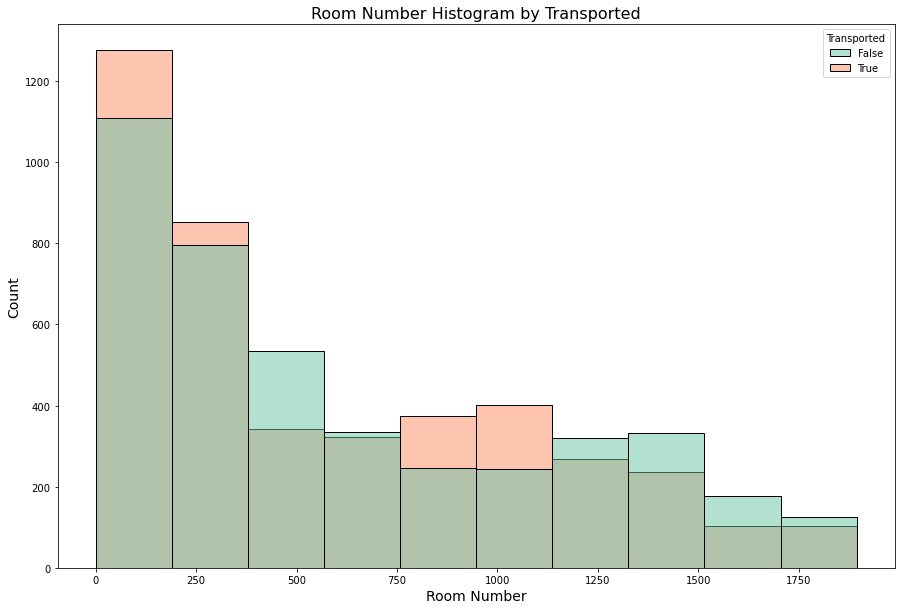

<Figure size 432x288 with 0 Axes>

In [62]:
plt.figure(figsize=(15,10))
sns.histplot(x='RoomNum', data=space_clean, hue='Transported', bins=10)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Room Number', fontsize=14)
plt.title('Room Number Histogram by Transported', fontsize=16)
plt.show()
plt.clf()

## Multi-Variable Visualisations

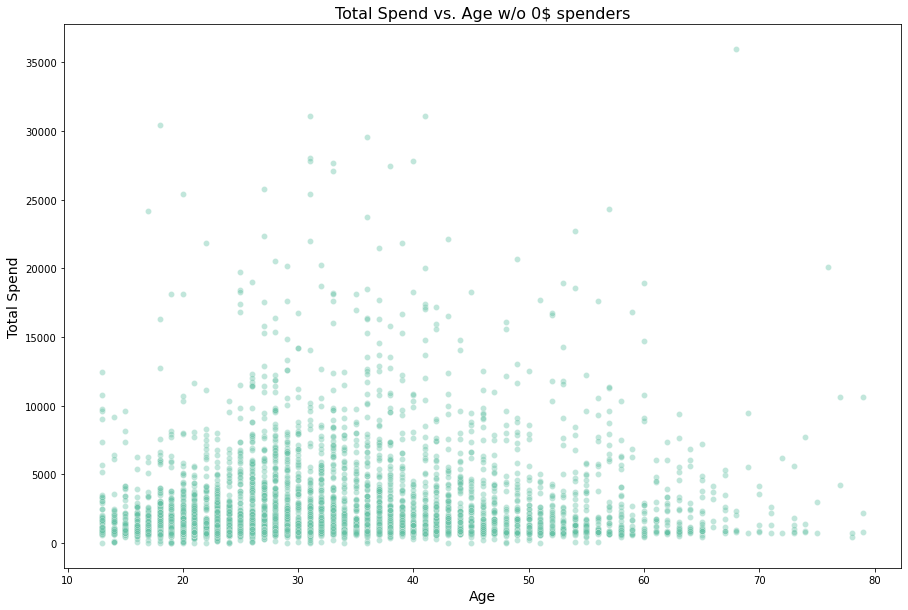

<Figure size 432x288 with 0 Axes>

In [76]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Age', y='TotalSpend', data=space_clean[space_clean['TotalSpend'] > 0], alpha=.4)
plt.ylabel('Total Spend', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Total Spend vs. Age w/o 0$ spenders', fontsize=16)
plt.show()
plt.clf()

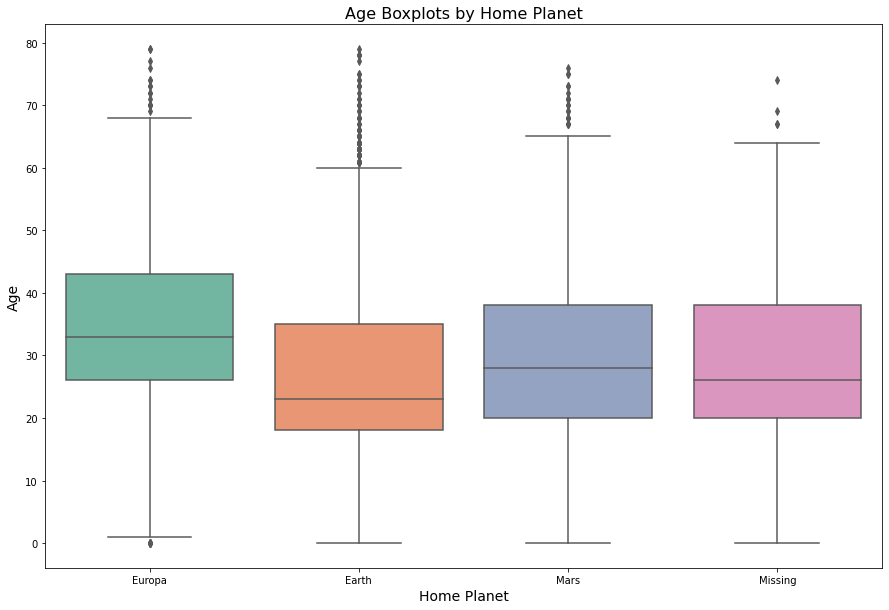

<Figure size 432x288 with 0 Axes>

In [78]:
plt.figure(figsize=(15,10))
sns.boxplot(x='HomePlanet', y='Age', data=space_clean)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Home Planet', fontsize=14)
plt.title('Age Boxplots by Home Planet', fontsize=16)
plt.show()
plt.clf()

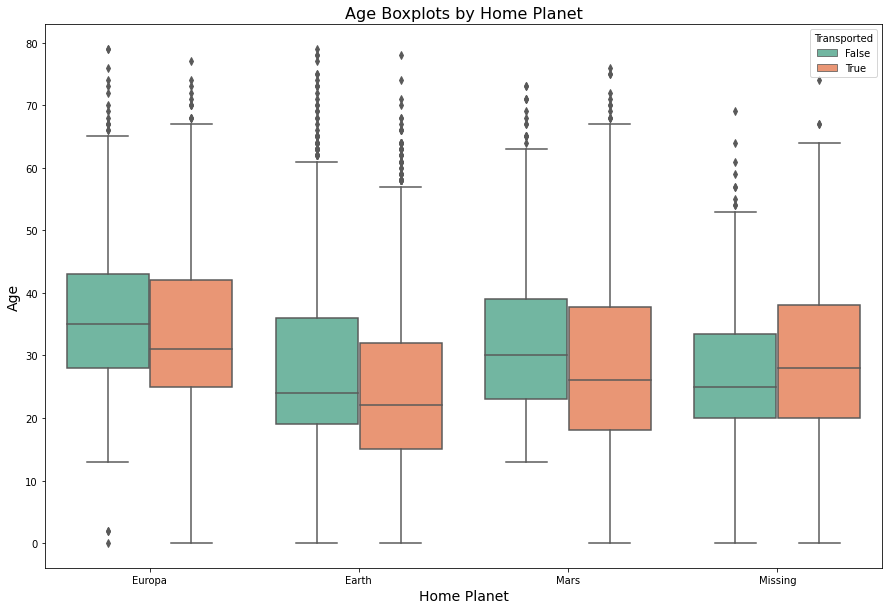

<Figure size 432x288 with 0 Axes>

In [79]:
plt.figure(figsize=(15,10))
sns.boxplot(x='HomePlanet', y='Age', hue='Transported', data=space_clean)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Home Planet', fontsize=14)
plt.title('Age Boxplots by Home Planet', fontsize=16)
plt.show()
plt.clf()

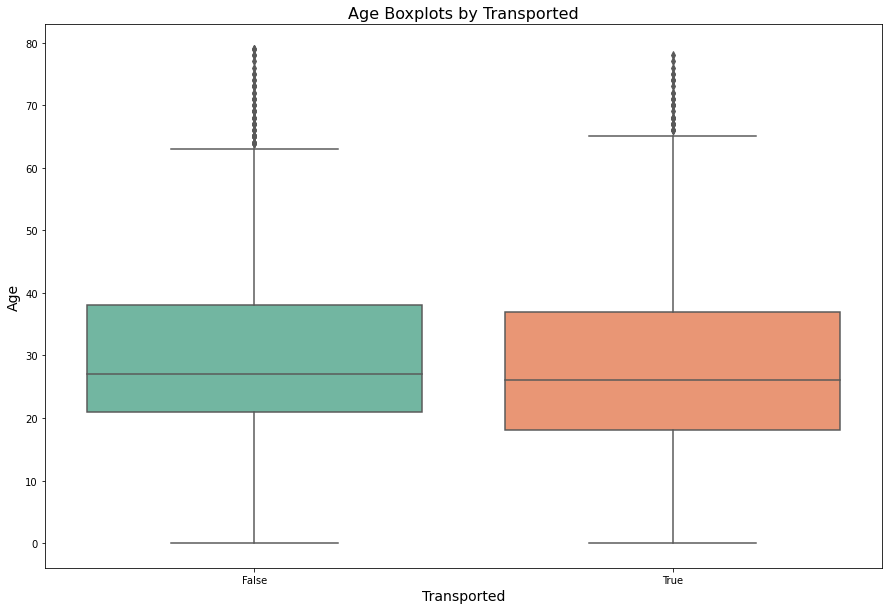

<Figure size 432x288 with 0 Axes>

In [80]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Transported', y='Age', data=space_clean)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Transported', fontsize=14)
plt.title('Age Boxplots by Transported', fontsize=16)
plt.show()
plt.clf()

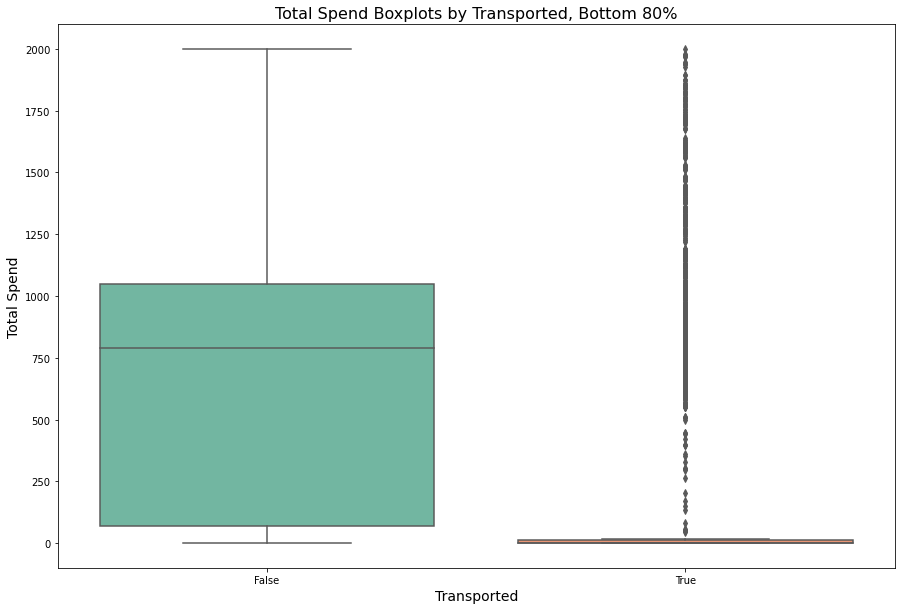

<Figure size 432x288 with 0 Axes>

In [83]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Transported', y='TotalSpend', data=space_clean[space_clean['TotalSpend'] <=2000])
plt.ylabel('Total Spend', fontsize=14)
plt.xlabel('Transported', fontsize=14)
plt.title('Total Spend Boxplots by Transported, Bottom 80%', fontsize=16)
plt.show()
plt.clf()

In [84]:
space_clean

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNum,IsGroup,Deck,RoomNum,Side,TotalSpend
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,False,B,0.0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,False,F,0.0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,True,A,0.0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,True,A,0.0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,False,F,1.0,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,False,A,98.0,P,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,False,G,1499.0,S,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,False,G,1500.0,S,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,True,E,608.0,S,4637.0


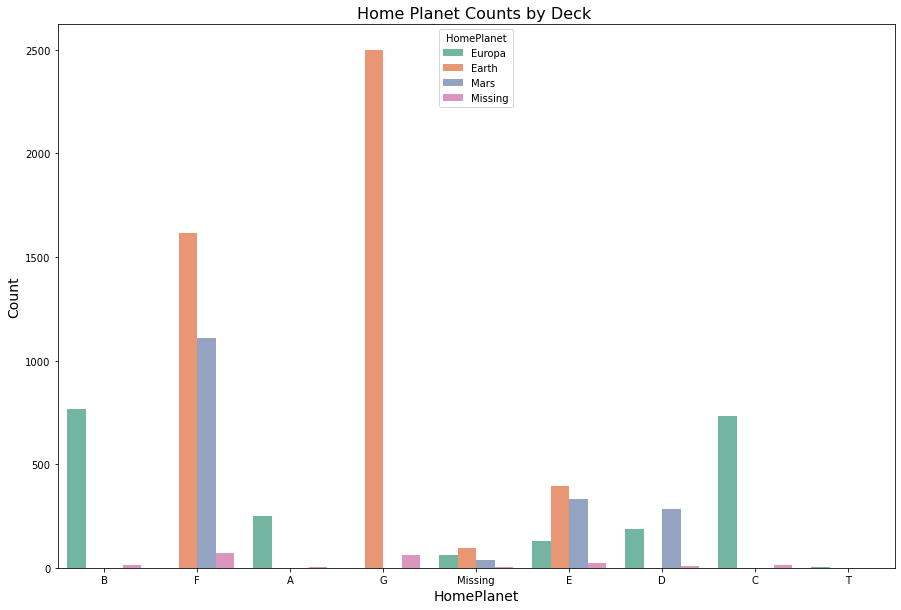

<Figure size 432x288 with 0 Axes>

In [86]:
plt.figure(figsize=(15,10))
sns.countplot(x='Deck', hue='HomePlanet', data=space_clean)
plt.ylabel('Count', fontsize=14)
plt.xlabel('HomePlanet', fontsize=14)
plt.title('Home Planet Counts by Deck ', fontsize=16)
plt.show()
plt.clf()

<AxesSubplot:xlabel='Deck', ylabel='HomePlanet'>

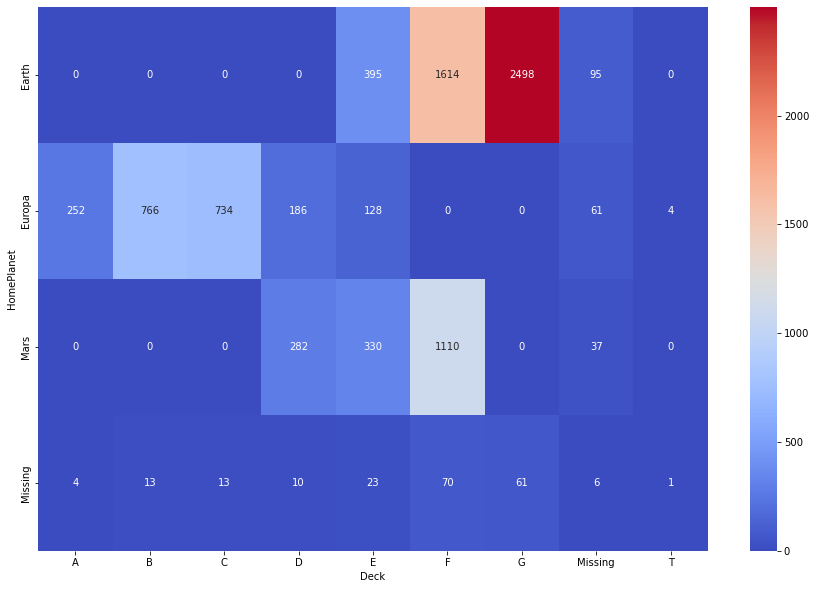

In [89]:
CDHP_gb=space_clean.groupby(['Deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(15,10))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm')

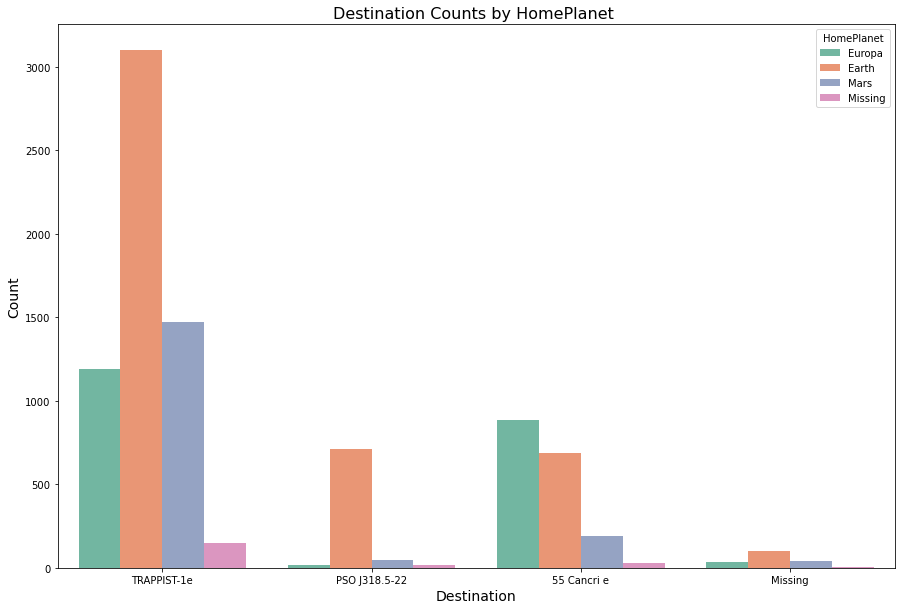

<Figure size 432x288 with 0 Axes>

In [90]:
plt.figure(figsize=(15,10))
sns.countplot(x='Destination', hue='HomePlanet', data=space_clean)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Destination', fontsize=14)
plt.title('Destination Counts by HomePlanet ', fontsize=16)
plt.show()
plt.clf()

<AxesSubplot:xlabel='Destination', ylabel='HomePlanet'>

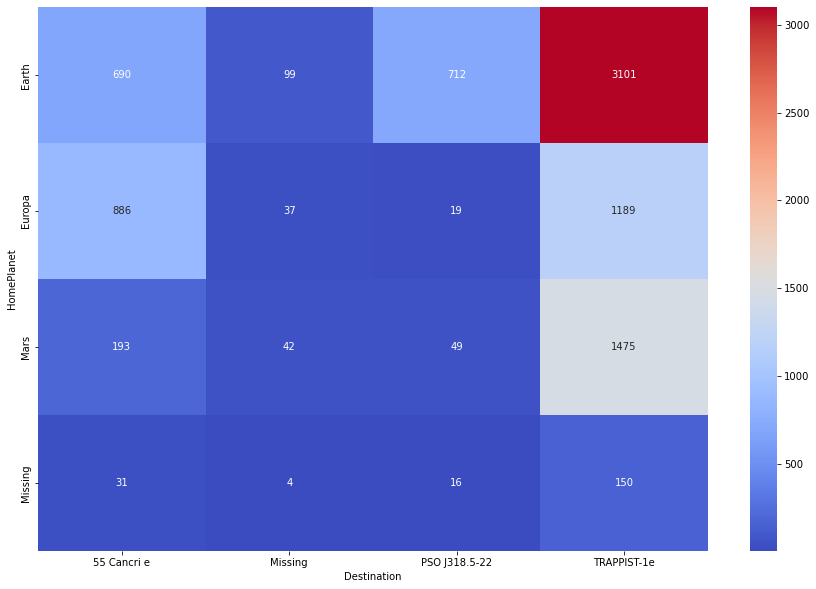

In [91]:
CDHP_gb=space_clean.groupby(['Destination','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(15,10))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm')